In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# To ignore all warnings (not recommended unless you're sure):
warnings.filterwarnings("ignore")

# To ignore a specific category of warnings (e.g., DeprecationWarning):
warnings.filterwarnings("ignore", category=DeprecationWarning)

# To ignore a specific warning message (e.g., a specific string in the warning message):
warnings.filterwarnings("ignore", message="Some specific warning message")

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Feature Analysis

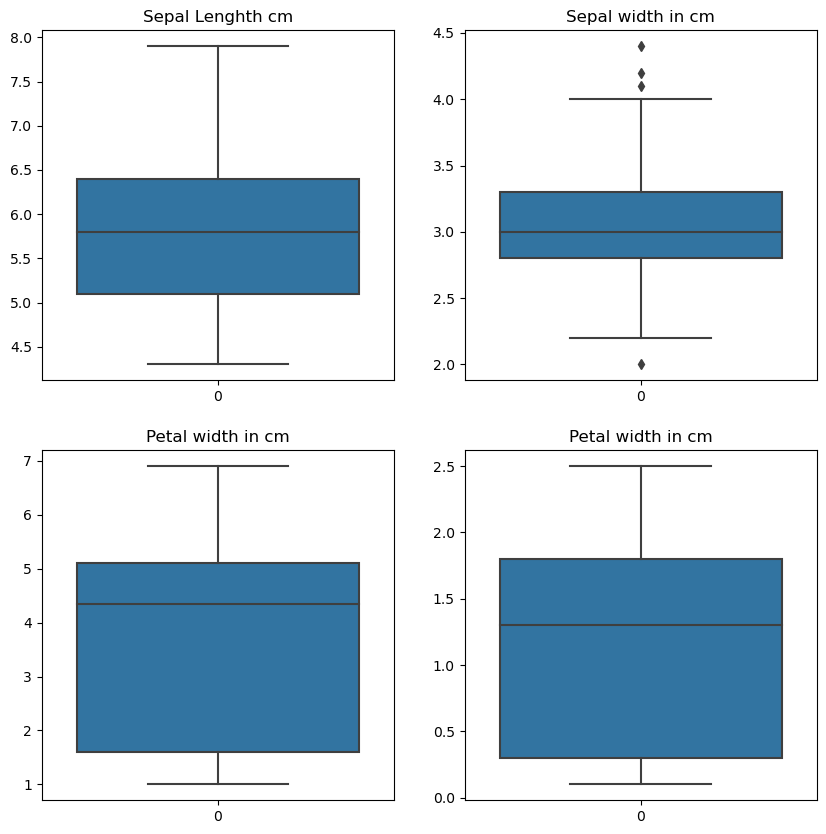

In [5]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.title('Sepal Lenghth cm')
sns.boxplot(df.SepalLengthCm)
plt.subplot(2,2,2)
plt.title('Sepal width in cm')
sns.boxplot(df.SepalWidthCm)
plt.subplot(2,2,3)
plt.title('Petal width in cm')
sns.boxplot(df.PetalLengthCm)
plt.subplot(2,2,4)
plt.title('Petal width in cm')
sns.boxplot(df.PetalWidthCm)
plt.show()

# Scaling the variables

In [7]:
df1=df.iloc[:,1:5]

In [9]:
# Instantiate scaling

In [10]:
scalar=StandardScaler()

In [11]:
scaled_df1=scalar.fit_transform(df1)

In [12]:
scaled_df1.shape

(150, 4)

In [13]:
scaled_df1=pd.DataFrame(scaled_df1)

In [14]:
scaled_df1.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [15]:
scaled_df1.rename(columns={0:"SepalLengthCm",1:"SepalWidthCm",2:"PetalLengthCm",3:"PetalWidthCm"},inplace=True)

In [16]:
scaled_df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977



# Hopkins statistic

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(scaled_df1)

0.8801969212999659

# Elbow method

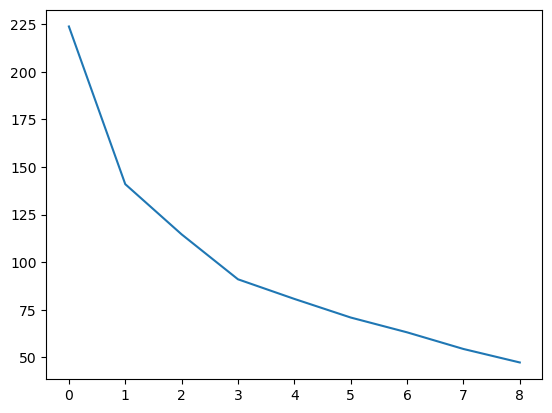

In [18]:
ssd=[]
range_n_clusters=[2, 3, 4, 5, 6, 7, 8,9,10]
for i in range_n_clusters:
    kmeans= KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(scaled_df1)
    ssd.append(kmeans.inertia_)
    
    
plt.plot(ssd)

The elbow curve shows k=3 is optimum

In [19]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled_df1)

KMeans(n_clusters=3)

In [20]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Box Plot distribution of clusters

In [22]:
df['labels']=kmeans.labels_

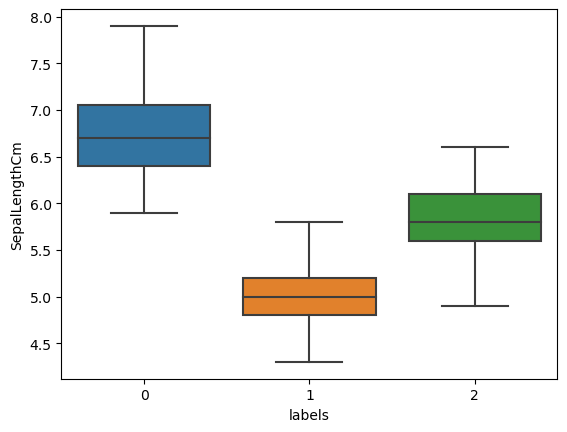

In [23]:
sns.boxplot(x=df.labels,y=df.SepalLengthCm)
plt.show()

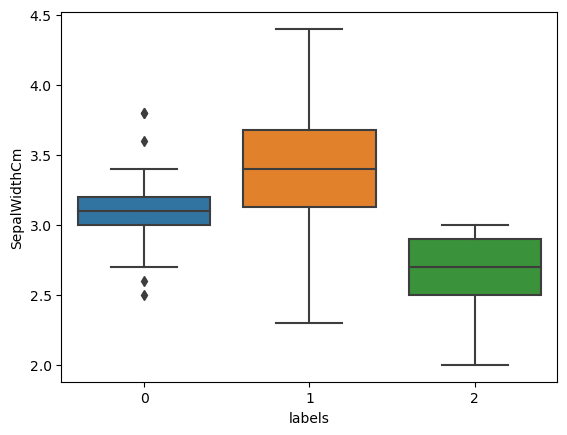

In [24]:
sns.boxplot(x=df.labels,y=df.SepalWidthCm)
plt.show()

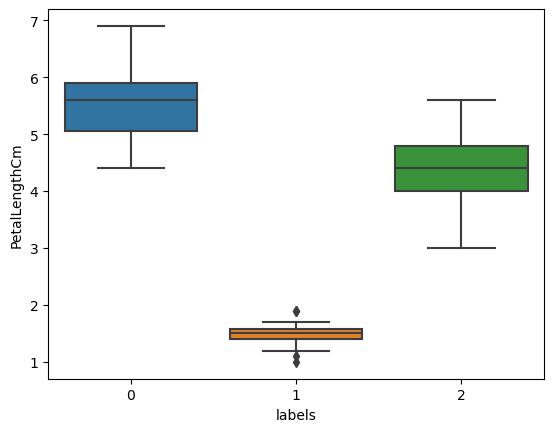

In [25]:
sns.boxplot(x=df.labels,y=df.PetalLengthCm)
plt.show()

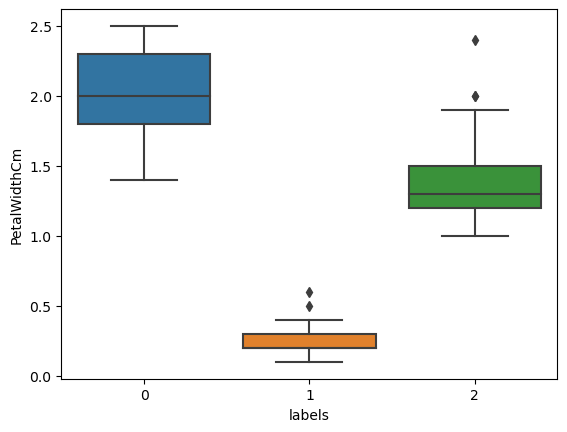

In [26]:
sns.boxplot(x=df.labels,y=df.PetalWidthCm)
plt.show()

In [27]:
filtered_label_0=df[df['labels']==0]
filtered_label_1=df[df['labels']==1]
filtered_label_2=df[df['labels']==2]

# Scatter plot distribution for Clusters

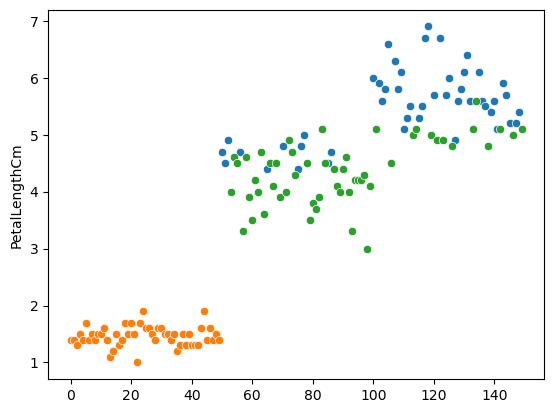

In [28]:
sns.scatterplot(filtered_label_0.PetalLengthCm)
sns.scatterplot(filtered_label_1.PetalLengthCm)
sns.scatterplot(filtered_label_2.PetalLengthCm)
plt.show()

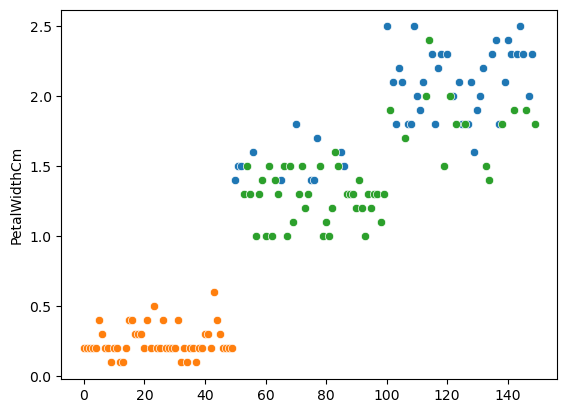

In [29]:
sns.scatterplot(filtered_label_0.PetalWidthCm)
sns.scatterplot(filtered_label_1.PetalWidthCm)
sns.scatterplot(filtered_label_2.PetalWidthCm)
plt.show()

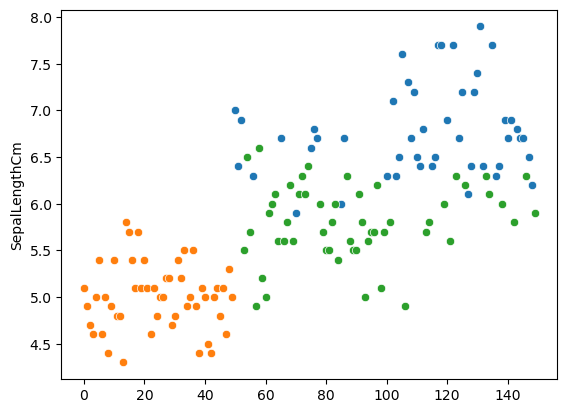

In [30]:
sns.scatterplot(filtered_label_0.SepalLengthCm)
sns.scatterplot(filtered_label_1.SepalLengthCm)
sns.scatterplot(filtered_label_2.SepalLengthCm)
plt.show()